In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Training Multinomial Naive Bayes...
Training time: 2.39 seconds
Multinomial Naive Bayes accuracy: 0.8891
Multinomial Naive Bayes report:
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      1900
           2       0.94      0.97      0.95      1900
           3       0.86      0.83      0.85      1900
           4       0.85      0.87      0.86      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.89      7601
   macro avg       0.71      0.71      0.71      7601
weighted avg       0.89      0.89      0.89      7601



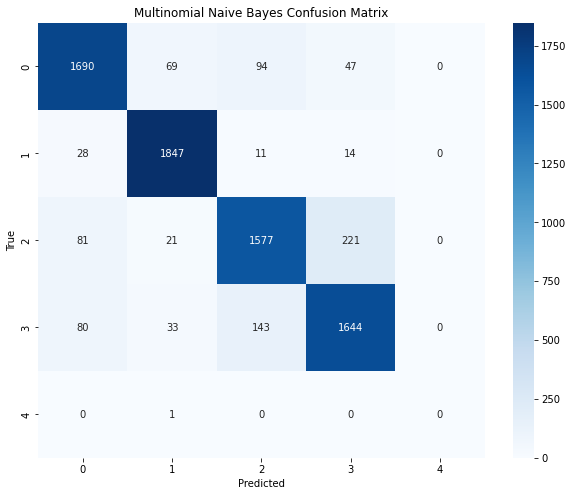

Training Decision Trees...
Training time: 499.46 seconds
Decision Trees accuracy: 0.7758
Decision Trees report:
              precision    recall  f1-score   support

           1       0.79      0.78      0.79      1900
           2       0.85      0.85      0.85      1900
           3       0.73      0.73      0.73      1900
           4       0.74      0.74      0.74      1900
 Class Index       1.00      1.00      1.00         1

    accuracy                           0.78      7601
   macro avg       0.82      0.82      0.82      7601
weighted avg       0.78      0.78      0.78      7601



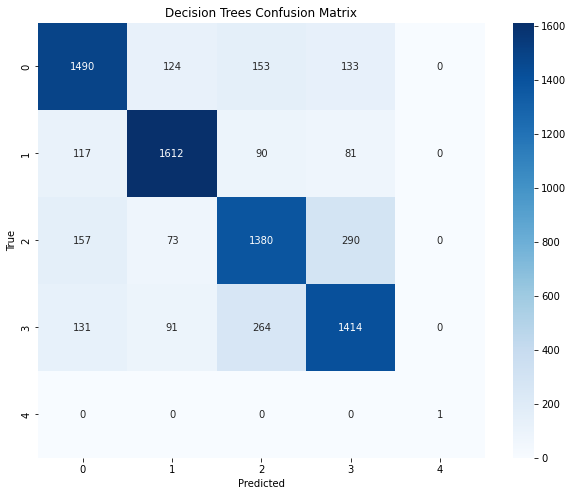

Training Gaussian Naive Bayes...
Training time: 9.43 seconds
Gaussian Naive Bayes accuracy: 0.8645
Gaussian Naive Bayes report:
              precision    recall  f1-score   support

           1       0.91      0.82      0.86      1900
           2       0.89      0.97      0.93      1900
           3       0.81      0.83      0.82      1900
           4       0.85      0.83      0.84      1900
 Class Index       1.00      1.00      1.00         1

    accuracy                           0.86      7601
   macro avg       0.89      0.89      0.89      7601
weighted avg       0.87      0.86      0.86      7601



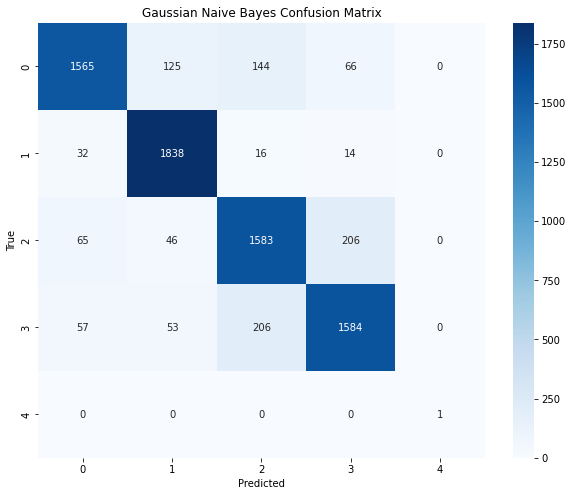

Training Stochastic Gradient Descent...
Training time: 51.86 seconds
Stochastic Gradient Descent accuracy: 0.9026
Stochastic Gradient Descent report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90      1900
           2       0.94      0.98      0.96      1900
           3       0.87      0.86      0.87      1900
           4       0.88      0.88      0.88      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.90      7601
   macro avg       0.72      0.72      0.72      7601
weighted avg       0.90      0.90      0.90      7601



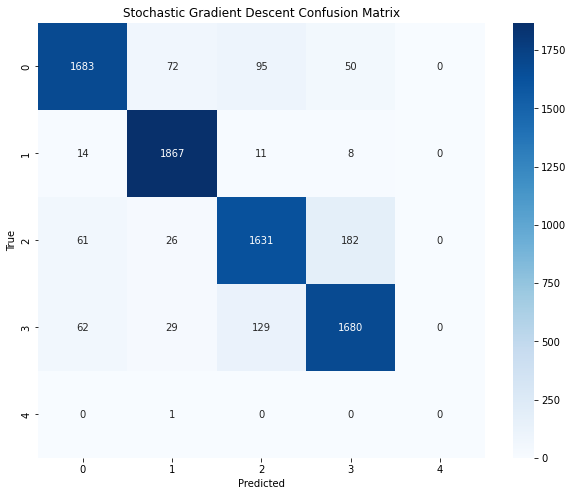

Training LightGBM...
Training time: 175.80 seconds
LightGBM accuracy: 0.8754
LightGBM report:
              precision    recall  f1-score   support

           1       0.89      0.87      0.88      1900
           2       0.91      0.95      0.93      1900
           3       0.85      0.83      0.84      1900
           4       0.85      0.85      0.85      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.88      7601
   macro avg       0.70      0.70      0.70      7601
weighted avg       0.87      0.88      0.87      7601



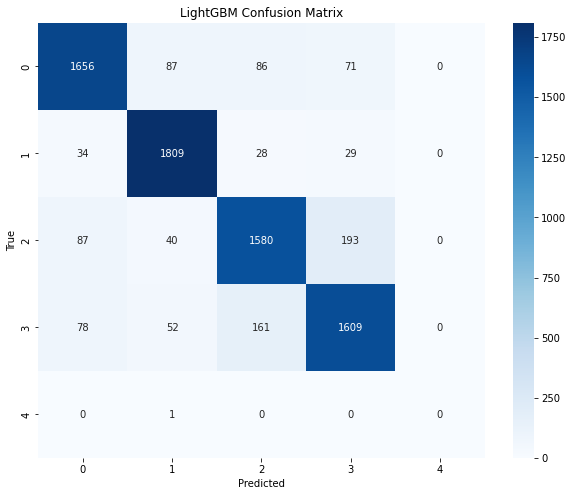


Results:
Multinomial Naive Bayes: accuracy=0.8891, time taken=2.39 seconds
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      1900
           2       0.94      0.97      0.95      1900
           3       0.86      0.83      0.85      1900
           4       0.85      0.87      0.86      1900
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.89      7601
   macro avg       0.71      0.71      0.71      7601
weighted avg       0.89      0.89      0.89      7601

Decision Trees: accuracy=0.7758, time taken=499.46 seconds
              precision    recall  f1-score   support

           1       0.79      0.78      0.79      1900
           2       0.85      0.85      0.85      1900
           3       0.73      0.73      0.73      1900
           4       0.74      0.74      0.74      1900
 Class Index       1.00      1.00      1.00         1

    accuracy                           0.78      7

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
import lightgbm as lgbm
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Load the AG News dataset
train_df = pd.read_csv('/content/gdrive/MyDrive/Common_Crawl/data/train.csv', header=None, names=['class', 'title', 'description'])
test_df = pd.read_csv('/content/gdrive/MyDrive/Common_Crawl/data/test.csv', header=None, names=['class', 'title', 'description'])

# Concatenate title and description into a single text column
train_df['text'] = train_df['title'] + ' ' + train_df['description']
test_df['text'] = test_df['title'] + ' ' + test_df['description']

# Create a TF-IDF vectorizer to transform the text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text']).toarray()
X_test = vectorizer.transform(test_df['text']).toarray()
y_train = train_df['class']
y_test = test_df['class']

# Define the models to evaluate
models = [
    {'name': 'Multinomial Naive Bayes', 'model': MultinomialNB()},
    {'name': 'Decision Trees', 'model': DecisionTreeClassifier()},
    {'name': 'Gaussian Naive Bayes', 'model': GaussianNB()},
    {'name': 'Stochastic Gradient Descent', 'model': SGDClassifier()},
    {'name': 'LightGBM', 'model': lgbm.LGBMClassifier()},
]

results = []
for model_dict in models:
    model = model_dict['model']
    model_name = model_dict['name']

    print(f"Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    time_taken = end_time - start_time
    print(f"Training time: {time_taken:.2f} seconds")

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    print(f"{model_name} accuracy: {acc:.4f}")
    print(f"{model_name} report:")
    print(report)

    # Store the results
    results.append({
        'model': model_name,
        'accuracy': acc,
        'time_taken': time_taken,
        'report': report
    })

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.title(f"{model_name} Confusion Matrix")
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Print the results
print("\nResults:")
for result in results:
  print(f"{result['model']}: accuracy={result['accuracy']:.4f}, time taken={result['time_taken']:.2f} seconds\n{result['report']}")


In [ ]:
df = pd.read_parquet('/content/gdrive/MyDrive/Common_Crawl/data/eng_data.parquet')

In [ ]:
df.columns

Index(['url', 'text', 'title'], dtype='object')